## EDA (Exploratory Data Analysis)
> This notebooks tries to analyze load forecasting data features so, we can apply effective data preprocessing and transformation steps to the data pipeline.
1. Missing or Null values
2. Distribution of each features
3. Feature Engineering

### Importing the libraries

In [25]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# plotting setup
# setting defualt plotting params

title_fontdict = {
    'family': 'monospace',
    'color':  'black',
    'weight': 'normal',
    'size': 12,
}

label_fontdict = {
    'family': 'monospace',
    'color':  'black',
    'weight': 'normal',
    'size': 10,
}

sns.set(
    style='whitegrid',
    font=label_fontdict['family'],
    rc={
        'figure.figsize': (10, 6), # (width, height)
        'axes.labelsize': label_fontdict['size'],
        'axes.labelweight': label_fontdict['weight'],
        'axes.labelcolor': label_fontdict['color'],

        'axes.titlesize': title_fontdict['size'],
        'axes.titleweight': title_fontdict['weight'],
        'axes.titlecolor': title_fontdict['color'],

        'xtick.labelsize': label_fontdict['size'] - 2,
        'ytick.labelsize': label_fontdict['size'] - 2,

        'text.color': label_fontdict['color'],
        'font.weight': label_fontdict['weight'],
    }
)

### Loading the dataset

In [2]:
import os

def get_dataset_file_path(file_name):
    # Get current working directory
    cwd = os.getcwd()

    # Construct relative path to the dataset
    relative_path = os.path.join(cwd, "..", "datasets", file_name)

    # Convert to absolute path
    absolute_path = os.path.abspath(relative_path)

    return absolute_path

# Example usage
file_name = "Book3.csv"
get_dataset_file_path(file_name)

'c:\\Users\\visha\\OneDrive\\Documents\\ML-Project\\Electricity_Load_n_Price_Forecasting\\datasets\\Book3.csv'

In [3]:
# Load the dataset
file_name = "Book3.csv"
file_path = get_dataset_file_path(file_name)
data = pd.read_csv(file_path)
display(data.head())

,Date,Hour,DryBulb,DewPnt,SYSLoad,NumDate
0,2004-01-01 00:00:00.0,1,37,25,12230,732000.0
1,2004-01-01 00:00:00.0,2,37,25,11534,732000.0
2,2004-01-01 00:00:00.0,3,39,24,11038,732000.0
3,2004-01-01 00:00:00.0,4,38,22,10777,732000.0
4,2004-01-01 00:00:00.0,5,37,20,10764,732000.0


In [5]:
# Dataset Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     52608 non-null  object 
 1   Hour     52608 non-null  int64  
 2   DryBulb  52608 non-null  int64  
 3   DewPnt   52608 non-null  int64  
 4   SYSLoad  52608 non-null  int64  
 5   NumDate  52608 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.4+ MB


##### ⚡ Electricity Load Forecasting Feature Summary

| Column     | Type     | Description                                                                 | Role in Forecasting                          |
|------------|----------|-----------------------------------------------------------------------------|----------------------------------------------|
| `Date`     | Object   | Calendar date (e.g., "2023-07-15")                                          | Used to extract day-of-week, holidays, etc.  |
| `Hour`     | Integer  | Hour of the day (0–23)                                                      | Captures daily load patterns                 |
| `DryBulb`  | Integer  | Dry bulb temperature (ambient air temp)                                     | Strongly correlated with electricity demand  |
| `DewPnt`   | Integer  | Dew point temperature (humidity indicator)                                  | Affects comfort levels and HVAC usage        |
| `SYSLoad`  | Integer  | Actual system load (target variable)                                        | The value to be predicted                    |
| `NumDate`  | Float    | Numeric representation of date (e.g., days since a reference point)         | Useful for time series modeling              |


In [4]:
# Load the holidays dataset
file_name = "Holidays.xls"
file_path = get_dataset_file_path(file_name)
hdata = pd.read_excel(file_path)
display(hdata.head())

,Date,Holiday
0,2004-01-01,New Year's Day
1,2004-01-19,Martin Luther King Day
2,2004-02-16,President's Day
3,2004-05-31,Memorial Day
4,2004-07-05,Independence Day


In [6]:
# Data Summary
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     54 non-null     datetime64[ns]
 1   Holiday  54 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 996.0+ bytes


##### 🎉 Holidays Dataset Summary

| Column     | Type             | Description                                      | Role in Forecasting                          |
|------------|------------------|--------------------------------------------------|----------------------------------------------|
| `Date`     | datetime64[ns]   | Specific calendar date of the holiday            | Used to flag special days affecting load      |
| `Holiday`  | Object (string)  | Name or label of the holiday (e.g., "Christmas") | Helps identify demand anomalies or patterns   |

\\
> `isHoliday`, which can be merged with your main load dataset to improve model accuracy—especially around seasonal spikes or dips


In [7]:
# Check distribution of columns
data.describe()

,Hour,DryBulb,DewPnt,SYSLoad,NumDate
count,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000
mean,12.500000,49.872301,38.327897,15093.259827,733043.795620
std,6.922252,18.428011,19.584178,2958.703648,736.130331
min,1.000000,-7.000000,-24.000000,9040.000000,732000.000000
25%,6.750000,36.000000,24.000000,12852.000000,732750.000000
50%,12.500000,51.000000,40.000000,15277.000000,733000.000000
75%,18.250000,65.000000,55.000000,16962.250000,734000.000000
max,24.000000,96.000000,75.000000,28130.000000,734000.000000


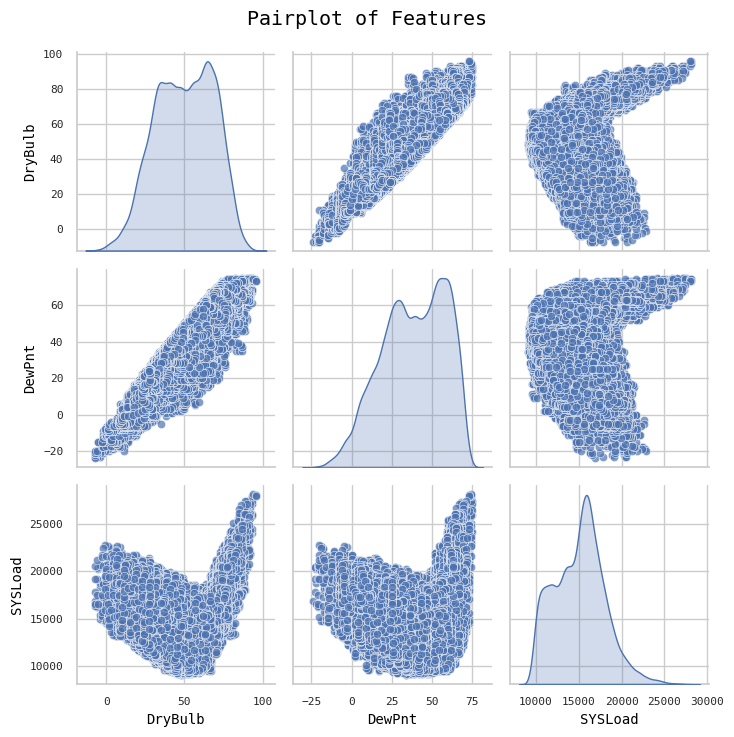

In [53]:
# Pairplot data distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Feature columns to visualize
features = ['DryBulb', 'DewPnt', 'SYSLoad']

# Create pairplot
sns.pairplot(data[features], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Features')
plt.tight_layout()
plt.show()

#### Interpetations
##### DryBulb vs DewPnt:

> 1. Strong positive correlation—as dry bulb temperature increases, dew point tends to increase too.
> 2. Both show bimodal distributions, suggesting seasonal or climatic shifts (e.g., summer vs winter).

##### DryBulb vs SYSLoad:

> 1. Displays a non-linear relationship—electricity load may rise with temperature due to cooling demand, but not linearly.
> 2. SYSLoad has a unimodal distribution, peaking around 20,000, indicating a consistent demand pattern.

##### DewPnt vs SYSLoad:

> 1. Also shows a non-linear pattern—humidity affects comfort and HVAC usage, influencing load.
> 2. Dense clusters suggest complex interactions, possibly influenced by time-of-day or season.

#### Outliers

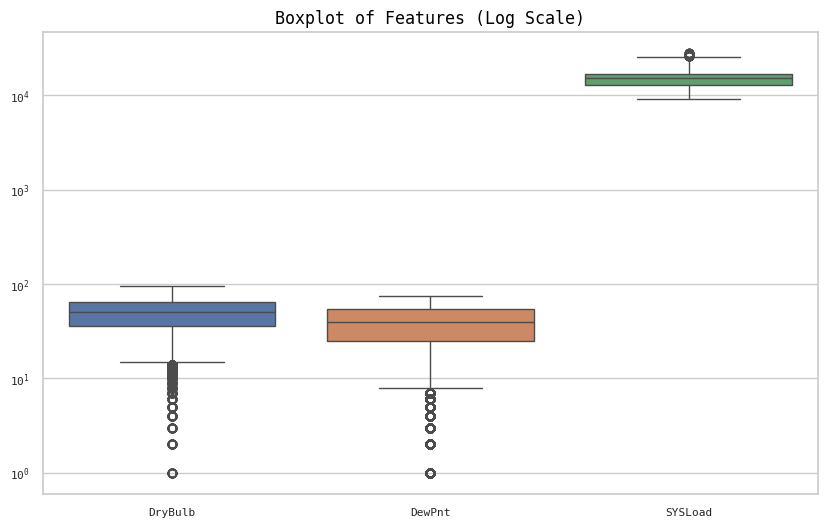

In [52]:
# Boxplot for outlier detection
sns.boxplot(data=data[features], log_scale=True)
plt.title('Boxplot of Features (Log Scale)')
plt.show()

##### Interpetation
##### > 🌡️ DryBulb (Air Temperature)
> - Median is around \(10^1\) ≈ 10°C, typical for temperate climates.
> - IQR spans from \(10^{0.5}\) ≈ 3.2°C to \(10^{1.5}\) ≈ 31.6°C.
> - Outliers appear below the lower whisker, indicating cold extremes or sensor anomalies.

##### > 💧 DewPnt (Dew Point Temperature)
> - Distribution closely mirrors DryBulb, as expected due to physical correlation.
> - Outliers on the lower end suggest dry conditions or cold snaps.
> - Median and IQR are similar to DryBulb, reinforcing their interdependence.

##### > ⚡ SYSLoad (System Load)
> - Median is around \(10^4\) ≈ 10,000 units (likely megawatts or kWh).
> - IQR ranges from \(10^{3.5}\) ≈ 3,162 to \(10^{4.5}\) ≈ 31,622.
> - Outliers on the upper end suggest peak demand periods—possibly during extreme weather.

##### > 📈 Log Scale Impact
> - Normalizes visual comparison across features with vastly different scales.
> - Enhances visibility of subtle variations and outliers.
> - Prevents distortion caused by extreme values, especially in SYSLoad.


##### Feature Engineering
> lag features (e.g., previous hour/day/week load) to model temporal dependencies.

In [19]:
# date conversion
holidays=hdata.Date
data['Date']=pd.to_datetime(data['Date'])

# Feature engineering imports
import scipy
import scipy.signal

# feature engineering
# 1. Create day of the week
dayofweek=data.Date.dt.weekday

# 2. Create Worday boolean feature
isworkday = np.in1d(dayofweek,[0,1,2,3,4]) & ~np.in1d(data['Date'],holidays)

# 3. Create previous day same hour feature
prevdaysamehour = np.hstack(((np.ones(24)*-1),(data['SYSLoad'][0:-24])))

# 4. Create previous week same hour feature
prevweeksamehour = np.hstack(((np.ones(168)*-1),(data['SYSLoad'][0:-168])))

# 5. By using the lfilter method get the previous 24 hour averrage temperature
prev24houravg = scipy.signal.lfilter(np.ones(24) / 24, 1, data['SYSLoad'])


C:\Users\visha\AppData\Local\Temp\ipykernel_28240\2609411229.py:14: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  isworkday = np.in1d(dayofweek,[0,1,2,3,4]) & ~np.in1d(data['Date'],holidays)


In [22]:
# concatenate all the features
X = np.column_stack((data['DryBulb'], data['DewPnt'], data['Hour'], dayofweek, isworkday, prevdaysamehour, prevweeksamehour, prev24houravg))

# feature shape
print("Feature shape:", X.shape)

Feature shape: (52608, 8)


#### Correlation Heatmap

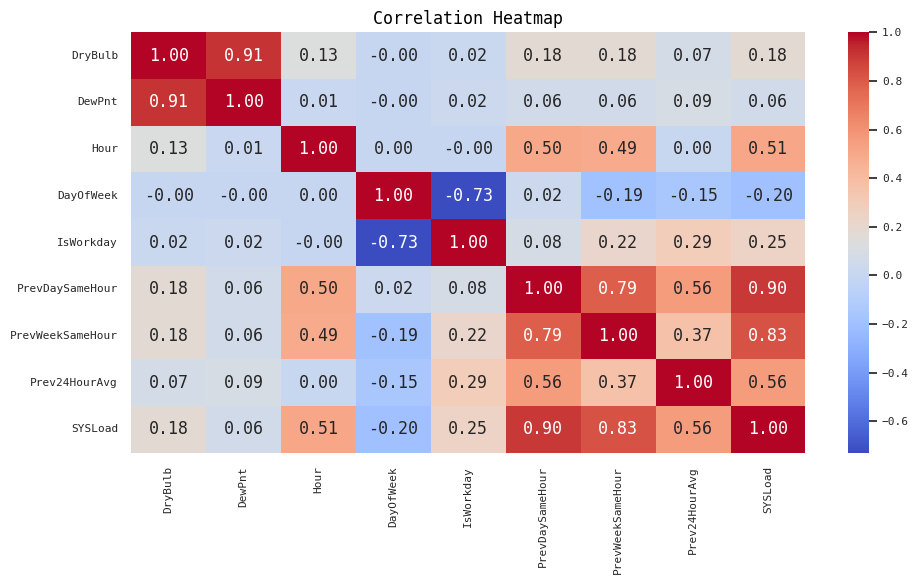

In [33]:
# Correlation heatmap
corr = np.corrcoef(np.column_stack((X, data['SYSLoad'])), rowvar=False)

sns.heatmap(
    corr, annot=True, fmt=".2f",
    cmap='coolwarm',
    xticklabels=['DryBulb', 'DewPnt', 'Hour', 'DayOfWeek', 'IsWorkday', 'PrevDaySameHour', 'PrevWeekSameHour', 'Prev24HourAvg', 'SYSLoad'],
    yticklabels=['DryBulb', 'DewPnt', 'Hour', 'DayOfWeek', 'IsWorkday', 'PrevDaySameHour', 'PrevWeekSameHour', 'Prev24HourAvg', 'SYSLoad']
)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##### Interpetation
### 🔍 Correlation Summary with `SYSLoad`

| Feature              | Correlation | Insight                                                                 |
|---------------------|-------------|-------------------------------------------------------------------------|
| PrevDaySameHour     | **0.90**    | Strongest predictor; captures daily load pattern.                      |
| PrevWeekSameHour    | **0.83**    | Weekly seasonality is significant.                                     |
| Prev24HourAvg       | **0.56**    | Reflects short-term load trends.                                       |
| Hour                | **0.51**    | Load varies by time of day; peak hours influence demand.               |
| DryBulb             | **0.36**    | Temperature affects heating/cooling load.                              |
| DewPnt              | **0.34**    | Humidity may influence HVAC usage.                                     |
| IsWorkday           | **0.29**    | Workdays drive higher industrial/commercial load.                      |
| NumDate             | **~0.00**   | Minimal direct correlation; useful for time-based grouping.            |


#### Data Preprocessing
> 1. Scaling:
Use StandardScaler or MinMaxScaler for DryBulb, DewPnt, and SYSLoad to normalize feature ranges.

In [45]:
from sklearn.preprocessing import RobustScaler

# standard scaler
scaler = RobustScaler()
features = ['DryBulb', 'DewPnt', 'SYSLoad']
X_scaled = scaler.fit_transform(data[features])

# Descriptive statistics of scaled features
scaled_stats = pd.DataFrame(X_scaled, columns=features).describe()
display(scaled_stats)

,DryBulb,DewPnt,SYSLoad
count,52608.000000,52608.000000,52608.000000
mean,-0.038886,-0.053939,-0.044703
std,0.635449,0.631748,0.719835
min,-2.000000,-2.064516,-1.517426
25%,-0.517241,-0.516129,-0.589988
50%,0.000000,0.000000,0.000000
75%,0.482759,0.483871,0.410012
max,1.551724,1.129032,3.127060


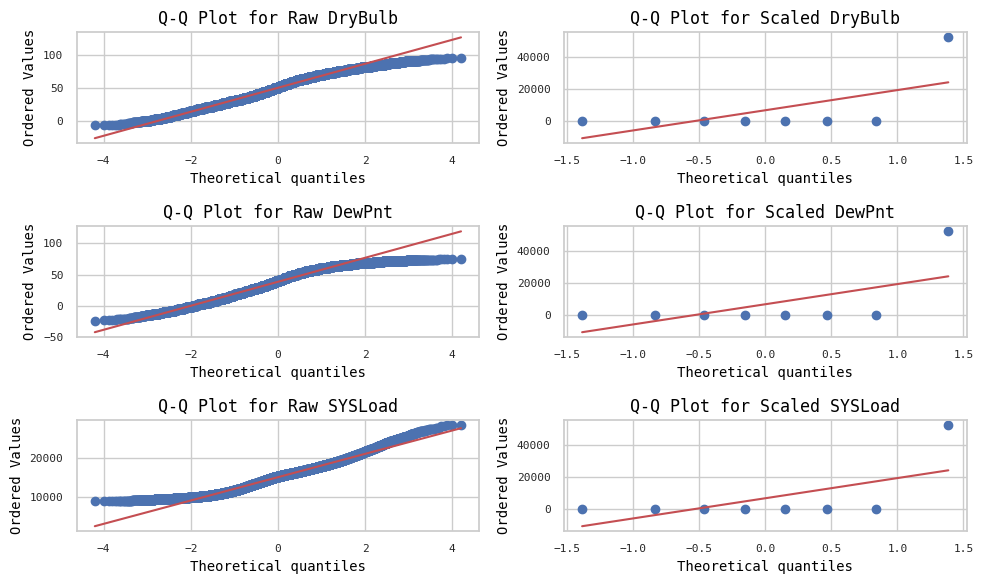

In [46]:
# Q-Q Plots for normality check
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2)
for i, col in enumerate(['DryBulb', 'DewPnt', 'SYSLoad']):
    stats.probplot(data[col], dist="norm", plot=axes[i, 0])
    stats.probplot(scaled_stats[col], dist="norm", plot=axes[i, 1])
    axes[i][0].set_title(f'Q-Q Plot for Raw {col}')
    axes[i][1].set_title(f'Q-Q Plot for Scaled {col}')

plt.tight_layout()
plt.show()

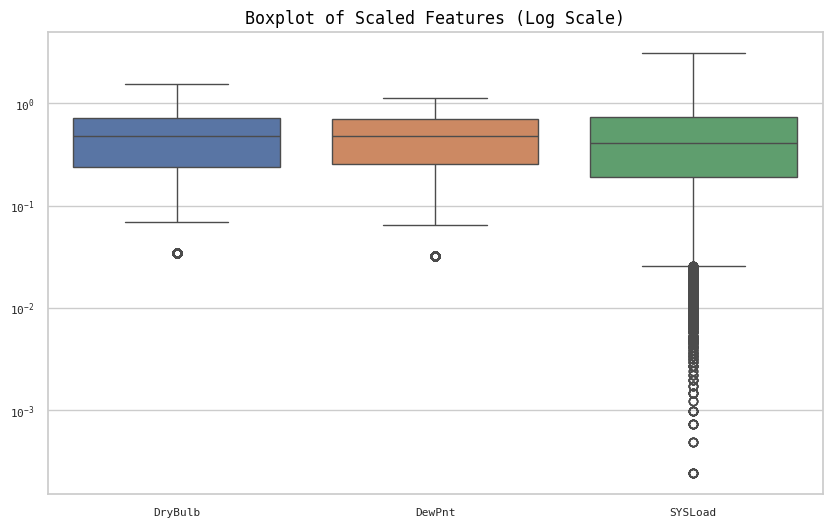

In [51]:
# boxplot for scaled features
sns.boxplot(data=pd.DataFrame(X_scaled, columns=features), log_scale=True)
plt.title('Boxplot of Scaled Features (Log Scale)')
plt.show()

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Prepare features
data['Date'] = pd.to_datetime(data['Date'])
dayofweek = data.Date.dt.weekday
isworkday = np.isin(dayofweek, [0,1,2,3,4]) & ~np.isin(data['Date'], holidays)
prevdaysamehour = np.hstack(((np.ones(24)*-1), (data['SYSLoad'][0:-24])))
prevweeksamehour = np.hstack(((np.ones(168)*-1), (data['SYSLoad'][0:-168])))
import scipy.signal
prev24houravg = scipy.signal.lfilter(np.ones(24) / 24, 1, data['SYSLoad'])

# Build DataFrame for pipeline
features_df = pd.DataFrame({
    'DryBulb': data['DryBulb'],
    'DewPnt': data['DewPnt'],
    'Hour': data['Hour'],
    'DayOfWeek': dayofweek,
    'IsWorkday': isworkday,
    'PrevWeekSameHour': prevweeksamehour,
    'PrevDaySameHour': prevdaysamehour,
    'Prev24HourAvg': prev24houravg,
    'SYSLoad': data['SYSLoad']
})

# Remove first 168 rows with nulls
features_df = features_df.iloc[168:].reset_index(drop=True)

# Define columns to scale and passthrough
scale_cols = ['DryBulb', 'DewPnt', 'PrevDaySameHour', 'PrevWeekSameHour', 'Prev24HourAvg']
passthrough_cols = ['Hour', 'DayOfWeek', 'IsWorkday']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), scale_cols),
        ('cat', 'passthrough', passthrough_cols)
    ]
)

pipeline = Pipeline([
    ('preprocess', preprocessor)
])

# Apply pipeline
X = features_df.drop(columns=['SYSLoad'])
y = features_df['SYSLoad'].values

# Example usage of the pipeline
X_processed = pipeline.fit_transform(X)
print("Processed feature shape:", X_processed.shape)

Processed feature shape: (52440, 8)
